In [55]:
import sys
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import os
from random import shuffle

sys.path.append('/home/jacob/work/ControlNet')

In [75]:
dataset = "PascalSegmentation"
version = 0
epoch = 0

In [82]:
def strip(file):
    gs = file.split('_gs-')[-1].split('_e-')[0]
    e = file.split('_e-')[-1].split('_b-')[0]
    b = file.split('_b-')[-1].split('.png')[0]
    return gs, e, b

image_log_dir = f'logs/{dataset}/image_logs/version_{version}/train'

possible_images = list(filter(lambda x: 'samples_cfg_scale_9.00_' in x and f"_e-{epoch:0>6}" in x, os.listdir(image_log_dir)))
shuffle(possible_images)
sample = possible_images[:10]
info = [strip(name) for name in sample]

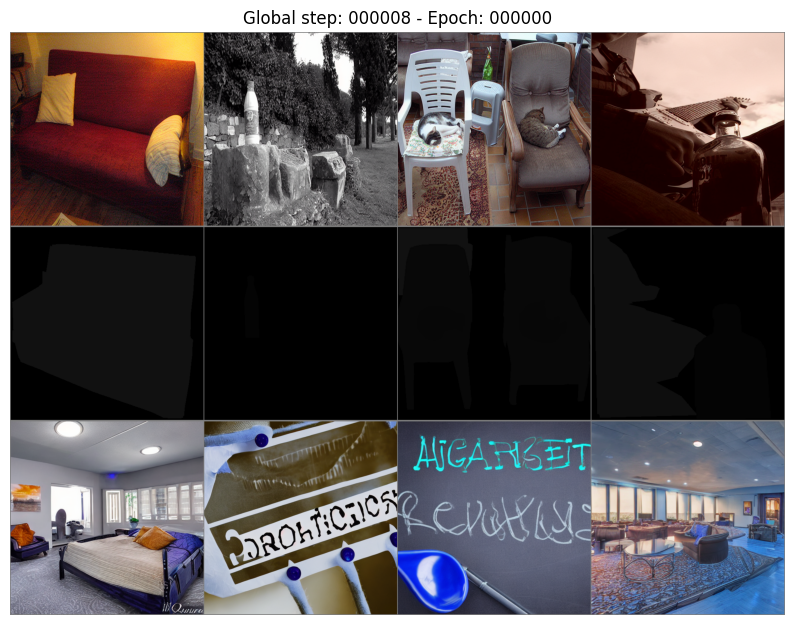

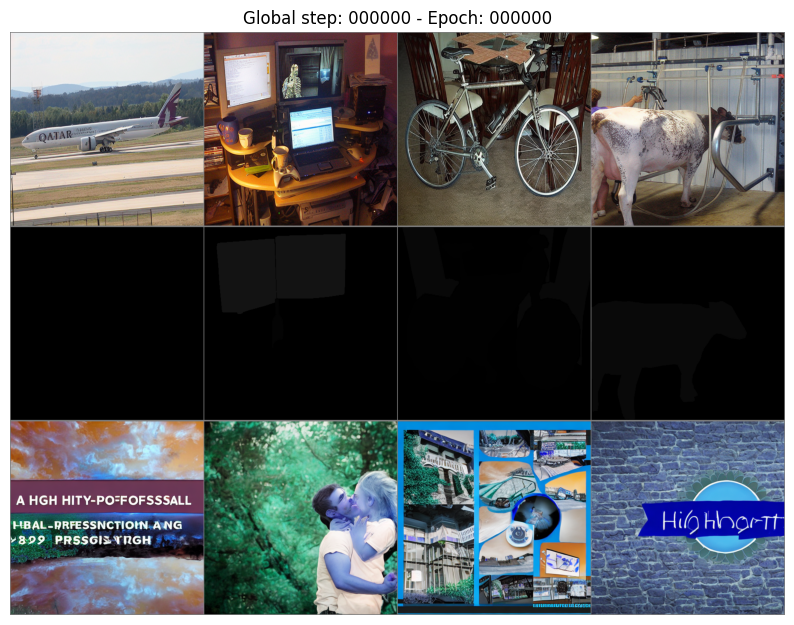

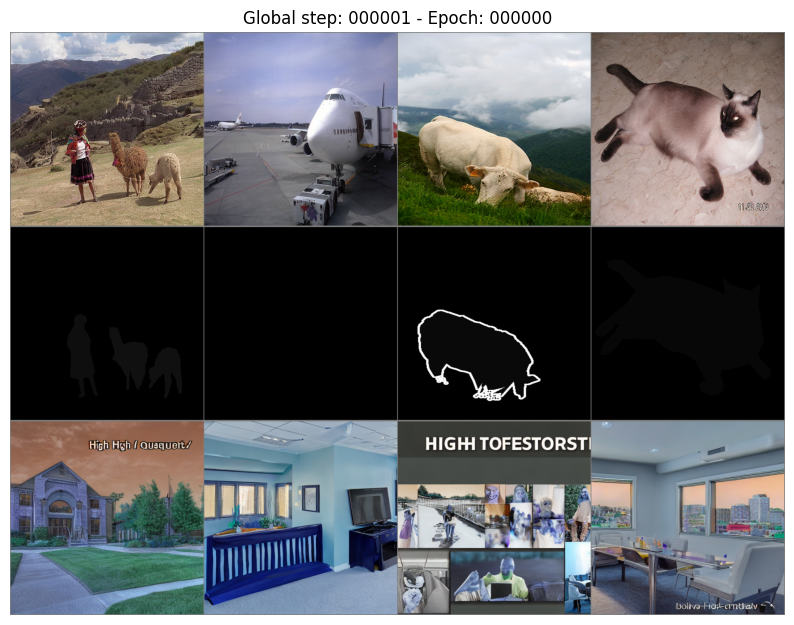

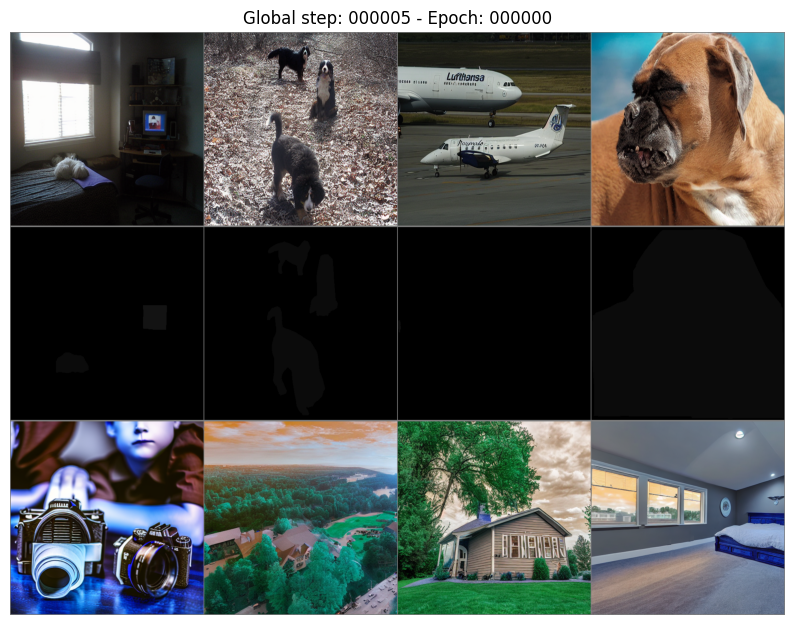

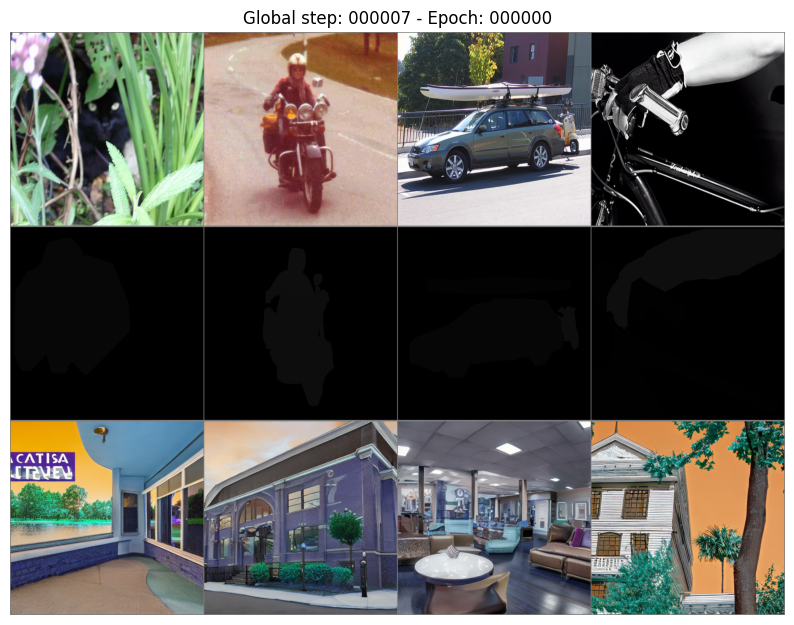

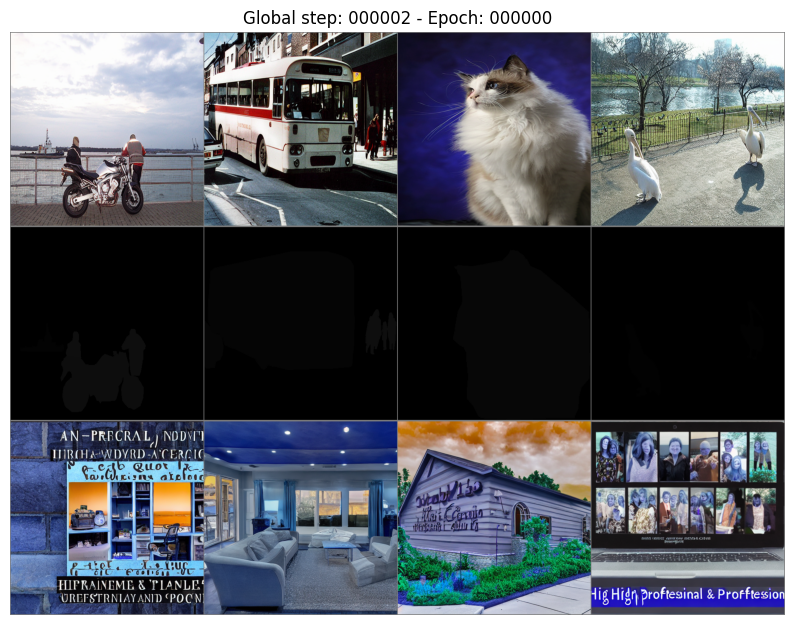

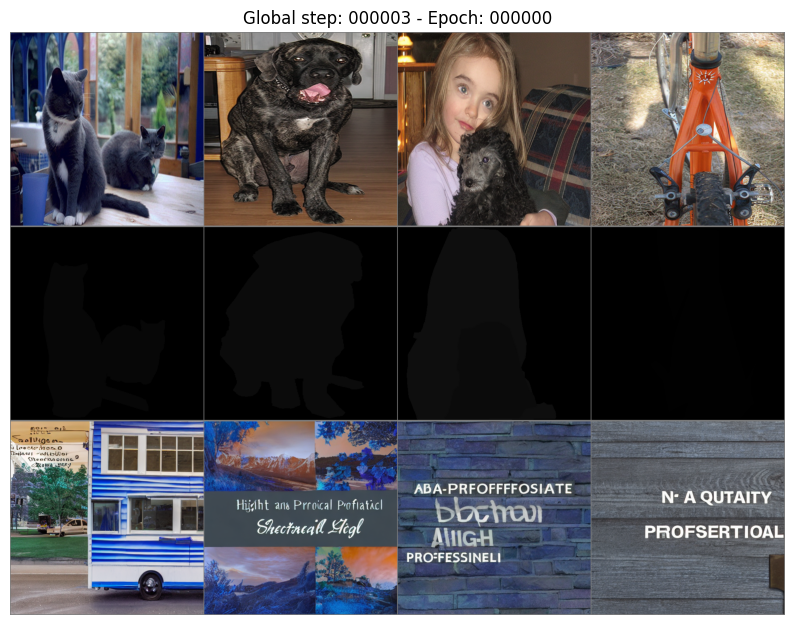

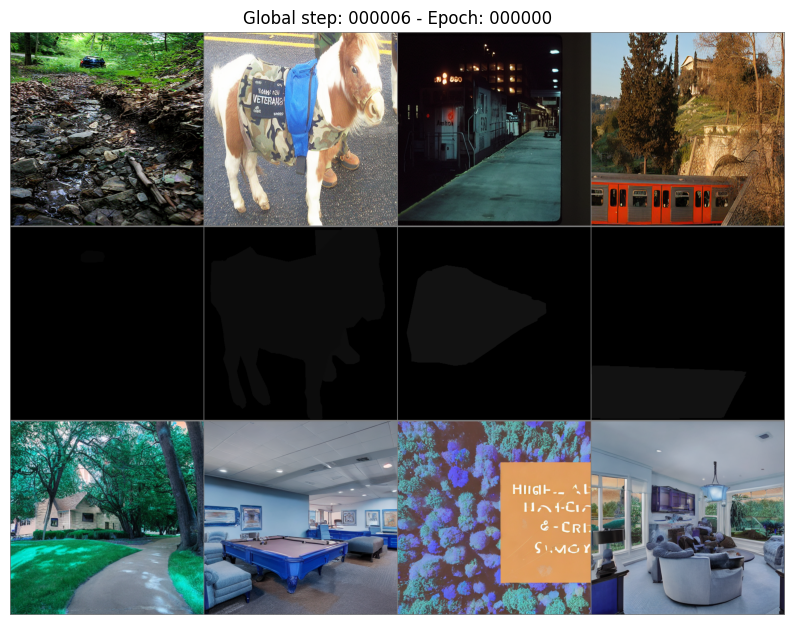

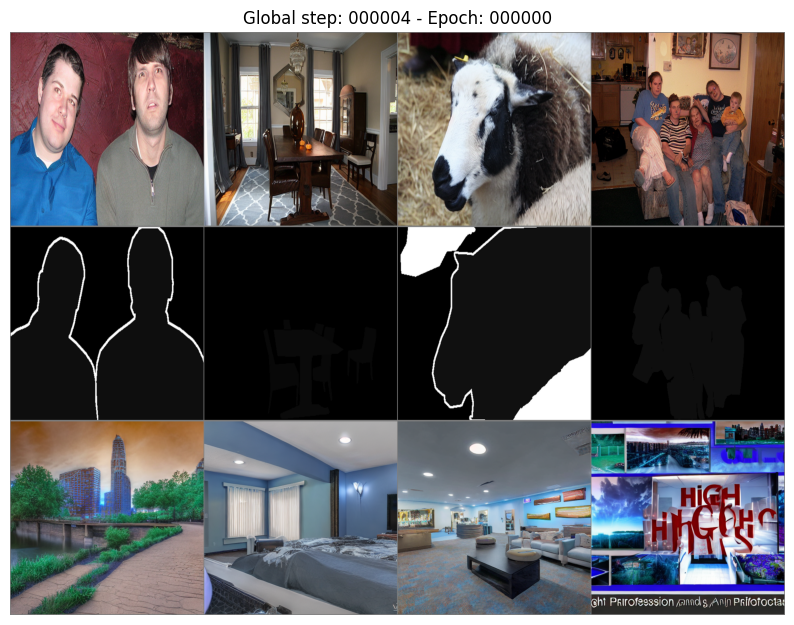

In [83]:
sample_path = lambda gs, e, b: f"{image_log_dir}/reconstruction_gs-{gs}_e-{e}_b-{b}.png"
mask_path = lambda gs, e, b: f"{image_log_dir}/control_gs-{gs}_e-{e}_b-{b}.png"
output_path = lambda gs, e, b: f"{image_log_dir}/samples_cfg_scale_9.00_gs-{gs}_e-{e}_b-{b}.png"

for (gs, e, b) in info:
    sample = image.imread(sample_path(gs, e, b))
    mask = image.imread(mask_path(gs, e, b))
    output = image.imread(output_path(gs, e, b))
    sample = sample[...,::-1]
    mask = mask[...,::-1]
    output = output[...,::-1]
    plt.figure(figsize=(10,30))
    plt.title(f"Global step: {gs} - Epoch: {e}")
    plt.imshow(np.concatenate([sample, mask, output], 0))
    plt.axis('off')